In [1]:
import numpy as np
import scipy as sp
import sympy as sy
from matplotlib import pyplot as plt

In [2]:
##違うのはここと最後の書き込みの部分だけ
f1, speech1 = sp.io.wavfile.read('./data/speechA1.wav')
f2, speech2 = sp.io.wavfile.read('./data/speechA2.wav')
##print(np.size(speech1))
##print(np.size(speech2))

In [3]:
z = np.array([speech1, speech2])
sigma = np.linalg.eig(np.cov(z))
D = sigma[0]
D = 1/np.sqrt(D)
E = sigma[1]
tmp = np.dot(E, np.diag(D))
V = np.dot(tmp, E.T)
z = np.dot(V,z)
size = len(speech1)

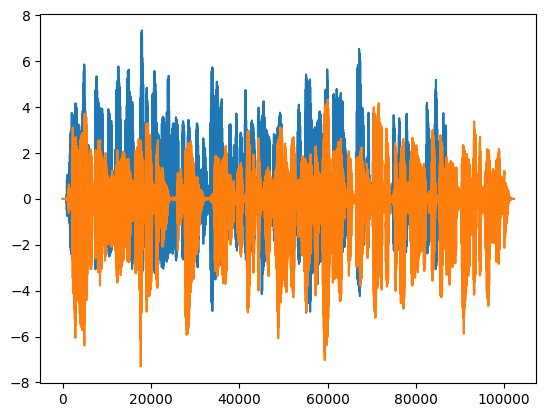

In [4]:
w = np.array([1,1])
wT = w.T
wT = wT/np.linalg.norm(wT)
former = w
while(1):
  wT = w.T
  tmp = np.power(np.dot(wT, z), 3)
  tmp = np.dot(z, tmp)
  tmp = tmp/size - 3*w
  tmp /= np.linalg.norm(tmp)
  w = tmp
  if(np.isclose(w,former).all() or np.isclose(w,former*(-1)).all()):
    break
  else:
    former = w
plt.plot(np.dot(w,z))
sp.io.wavfile.write('./result/speech1.wav', f1, np.dot(w,z))

w = np.array([0.5,0.5])
wT = w.T
wT = wT/np.linalg.norm(wT)
former = w
while(1):
  wT = w.T
  tmp = np.power(np.dot(wT, z), 3)
  tmp = np.dot(z, tmp)
  tmp = tmp/size - 3*w
  tmp /= np.linalg.norm(tmp)
  w = tmp
  if(np.isclose(w,former).all() or np.isclose(w,former*(-1)).all()):
    break
  else:
    former = w
plt.plot(np.dot(w,z))
sp.io.wavfile.write('./result/speech2.wav', f2, np.dot(w,z))